###[자연어처리] 텍스트 분류 모델 구현

- 데이터 셋 : 200개 한국어 뉴스 기사
- 라 벨 : 정치(0), 경제(1), 사회(2), 생활/문화(3), 세계(4), 기술/IT(5), 연예(6), 스포츠(7)
---
- csv 파일로 데이터를 전처리 하려고 함.
- tokenization ~ padding 까지

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

import string
import spacy
import soynlp
from konlpy.tag import Okt

- 문장마다 한 행으로 봐야 하는 걸까?
- 한 행을 뉴스 하나로 봐야 하는 걸까?
- 문장을 하자

In [2]:
# korean language model
Ko_MODEL = 'ko_core_news_sm'
ko_spacy = spacy.load(Ko_MODEL)
ko_okt = Okt()
ko_soynlp = soynlp.word.WordExtractor()

In [3]:
# punctuation
punct = string.punctuation
# 정규식 : text = re.sub('[^ㄱ-ㅎ가-힣]+', ' ', text)

In [4]:
DATA_PATH = '../data/news/'
LABEL_TRANSLATE = {0:'정치', 1:'경제', 2:'사회', 3:'생활/문화', 4:'세계',
                   5:'기술/IT', 6:'연예', 7:'스포츠'}

In [5]:
file_list_0 = os.listdir(DATA_PATH+'0/')
file_list_1 = os.listdir(DATA_PATH+'1/')
file_list_2 = os.listdir(DATA_PATH+'2/')
file_list_3 = os.listdir(DATA_PATH+'3/')
file_list_4 = os.listdir(DATA_PATH+'4/')
file_list_5 = os.listdir(DATA_PATH+'5/')
file_list_6 = os.listdir(DATA_PATH+'6/')
file_list_7 = os.listdir(DATA_PATH+'7/')

print(f"len: [0]- {len(file_list_0)}")
print(f"len: [1]- {len(file_list_1)}")
print(f"len: [2]- {len(file_list_2)}")
print(f"len: [3]- {len(file_list_3)}")
print(f"len: [4]- {len(file_list_4)}")
print(f"len: [5]- {len(file_list_5)}")
print(f"len: [6]- {len(file_list_6)}")
print(f"len: [7]- {len(file_list_7)}")

len: [0]- 200
len: [1]- 200
len: [2]- 200
len: [3]- 200
len: [4]- 200
len: [5]- 200
len: [6]- 200
len: [7]- 200


In [53]:
# 파일 읽어오는 함수
def read_file(file_path, file_list):
    # line 단위로 읽을 거임
    for file_name in file_list:
        with open(file_path+file_name, mode='rt', encoding='utf-8') as f:
            all_text = []
            while True:
                text = f.readline()
                text = text.replace('\n', '')
                text = text.replace('\t', '')
                text = re.sub('[^ㄱ-ㅎ가-힣]+', ' ', text)
                
                if not text:
                    break
                else:
                    all_text.append(text)
                    # all_text[-1].join(' ')
        yield all_text

In [71]:
def create_df(path_list, file_list):
    data_df = pd.DataFrame(columns=['text', 'label'])
    
    for i in range(len(path_list)):
        carry = []
        for text_list in read_file(path_list[i], file_list[i]):
            for text in text_list:
                carry.append(text)

        carry_df = pd.DataFrame(columns=['text', 'label'])
        carry_df['text'] = carry
        carry_df['label'] = i
        # print(len(carry_df))

        data_df = pd.concat([data_df, carry_df], ignore_index=True)
        
    return data_df

In [72]:
path_list = [DATA_PATH+f'{i}/' for i in range(8)]
file_list = [file_list_0, file_list_1, file_list_2, file_list_3,
             file_list_4, file_list_5, file_list_6, file_list_7]

data_df = create_df(path_list, file_list)
data_df

,text,label
0,동남아 담당 최희철 부상 베이징 도착 싱가포르행 주목최 부상 행선지 방문 목적 질문...,0
1,예결위 추경 막바지 심사 진통 여야 충돌 서울 연합뉴스 김남권 기자 국회 예산결산특...,0
2,외압 논란 항명 사태 산 넘고 물 건넌 권성동 영장 청구안미현 검사 외압 폭로 파문...,0
3,친문 홍영표 문빠에 찍혔다 특검 합의에 문자폭탄 공격대표적인 친 문재인계인 홍영표 ...,0
4,연일 비난 정상회담 전 경고성 메시지 발신 맥스선더 태영호 등 불만 표시,0
...,...,...
2256,올림픽 성공 뒷이야기 서울대 일 이희범 평창 조직위원장 초청 특강 이인환 기자 서울...,7
2257,일 개막 호치민 쿠션월드컵에 명 참가 확정 선수 명 참가 차 예선에 명 출전,7
2258,김행직 허정한 최성원 시드받아 본선 직행,7
2259,스포츠안전재단 대축전에 안전필요성 알려 스타뉴스 채준 기자,7


In [106]:
# korean stopword
# 내가 지정을 해야하나...
ko_stopwords =[]

with open('./ko_news_stopword.txt', mode='tr', encoding='utf-8') as f:
    while True:
        word = f.readline().replace('\n', '')
        if not word:
            break
        else:
            ko_stopwords.append(word)

# ko_stopwords


In [107]:
set(ko_stopwords)
len(ko_stopwords)

1961

In [108]:
for _ in ko_stopwords:
    print(_)

ㄱ
ㄴ
ㄷ
ㄹ
ㅁ
ㅂ
ㅅ
ㅇ
ㅈ
ㅊ
ㅋ
ㅌ
ㅍ
ㅎ
ㄲ
ㄸ
ㅃ
ㅆ
ㅉ
ㅏ
ㅑ
ㅓ
ㅑ
ㅗ
ㅛ
ㅜ
ㅠ
ㅡ
ㅣ
ㅐ
ㅒ
ㅔ
ㅖ
ㅚ
ㅟ
ㅘ
ㅝ
ㅢ
가
나
다
라
마
바
사
아
자
차
카
타
파
하
까
따
빠
싸
짜
갸
냐
댜
랴
먀
뱌
샤
야
쟈
챠
캬
탸
퍄
햐
꺄
땨
뺘
쌰
쨔
거
너
더
러
머
버
서
어
저
처
커
터
퍼
허
꺼
떠
뻐
써
쩌
겨
녀
뎌
려
며
벼
셔
여
져
쳐
켜
텨
펴
혀
껴
뗘
뼈
쎠
쪄
고
노
도
로
모
보
소
오
조
초
코
토
포
호
꼬
또
뽀
쏘
쪼
교
뇨
됴
료
묘
뵤
쇼
요
죠
쵸
쿄
툐
표
효
꾜
뚀
뾰
쑈
쬬
구
누
두
루
무
부
수
우
주
추
쿠
투
푸
후
꾸
뚜
뿌
쑤
쭈
규
뉴
듀
류
뮤
뷰
슈
유
쥬
츄
큐
튜
퓨
휴
뀨
뜌
쀼
쓔
쮸
그
느
드
르
므
브
스
으
즈
츠
크
트
프
흐
끄
뜨
쁘
쓰
쯔
기
니
디
리
미
비
시
이
지
치
키
티
피
히
끼
띠
삐
씨
찌
개
내
대
래
매
배
새
애
재
채
캐
태
패
해
깨
때
빼
쌔
째
계
녜
뎨
례
몌
볘
셰
예
졔
쳬
켸
톄
폐
혜
꼐
뗴
뼤
쎼
쪠
게
네
데
레
메
베
세
에
제
체
케
테
페
헤
께
떼
뻬
쎄
쩨
계
녜
뎨
례
몌
볘
셰
예
쩨
쳬
켸
톄
폐
혜
꼐
뗴
뼤
쎼
쪠
과
놔
돠
롸
뫄
봐
솨
와
좌
촤
콰
톼
퐈
화
꽈
똬
뽜
쏴
쫘
괴
뇌
되
뢰
뫼
뵈
쇠
외
죄
최
쾨
퇴
푀
회
꾀
뙤
뾔
쐬
쬐
귀
뉘
뒤
뤼
뮈
뷔
쉬
위
뮈
쥐
취
퀴
튀
퓌
휘
뀌
뛰
쀠
쒸
쮜
궈
눠
둬
둬
뤄
뭐
붜
숴
워
줘
춰
쿼
퉈
풔
훠
꿔
뚸
뿨
쒀
쭤
긔
늬
듸
릐
믜
븨
싀
의
즤
츼
킈
틔
픠
희
끠
띄
쁴
씌
쯰
은
는
이가
을
를
에게
그녀
이것
저것
그리고
그러나
그래서
하지만
매우
너무
정말
아주
약간
우와
음
흠
이런
저런
엿튼
쟀튼
이러나
저러나
저더러
끝
또는
및
혹은
그럼에도 불구하고
그럼에도
불구하고
반면에
반면
그러므로
때문에
만약
면
위해
기 위해
도록
비록
지만
에도
자마자
동안
후에
에서
에서는
에서의
까지
부터
밖에
만
하고도
하고
하고자

In [92]:
# delete stop words
def delete_stopword(data_df):
    # for text in data_df['text']:
    #     doc = ko_spacy(text)
    #     token_list = []
    #     for token in doc:
    #         if (not token.is_stop) and (token.pos_!='SPACE'):
    #             token_list.append(token)
    #     yield token_list
    
    token_list = []
    for text in data_df['text']:
        morphs = ko_okt.morphs(text)
        # morphs =ko_okt.pos(text, stem=True, norm=True)
        carry = []
        for token in morphs:
            if (not token in ko_stopwords):
                carry.append(token)
        token_list.append(carry)
    yield token_list
    
    # token_list = []
    # ko_soynlp.train(data_df['text'])
    # for text in data_df['text']:
        
    #     result = ko_soynlp.extract()
    #     score = {word:score.cohesion_forward for word, score in result.items()}
    #     tokenizer = soynlp.tokenizer.LTokenizer(score)
    #     carry = []
    #     for token in tokenizer.tokenize(text):
    #         if (not token in ko_stopwords) and (not token.isdecimal()):
    #             carry.append(token)
    #     token_list.append(carry)
    # yield token_list
    

In [109]:
carry = []
for text in delete_stopword(data_df):
    carry.append(text)
carry

[[['동남아',
   '담당',
   '최희',
   '부상',
   '베이징',
   '도착',
   '싱가포르',
   '주목',
   '부상',
   '행선',
   '방문',
   '목적',
   '질문',
   '묵묵'],
  ['결위',
   '추경',
   '막바지',
   '심사',
   '진통',
   '여야',
   '충돌',
   '서울',
   '김남',
   '국회',
   '예산',
   '결산',
   '특별',
   '위원회',
   '추가경정예산',
   '막바지',
   '심사',
   '돌입',
   '여야',
   '진통'],
  ['외압',
   '논란',
   '사태',
   '넘고',
   '건넌',
   '영장',
   '청구',
   '검사',
   '외압',
   '폭로',
   '파문',
   '사단',
   '구성',
   '영장'],
  ['친문',
   '홍영표',
   '문빠',
   '찍혔다',
   '특검',
   '합의',
   '문자',
   '폭탄',
   '공격대',
   '표적',
   '문재인',
   '홍영표',
   '더불어',
   '민주당',
   '신임',
   '원내대표',
   '최근',
   '대통령',
   '극렬',
   '지지자',
   '문빠',
   '들의',
   '공격',
   '대상',
   '문자',
   '폭탄',
   '시달리고',
   '여야',
   '갈등',
   '얼어붙었던',
   '국회',
   '정상화'],
  ['연일', '비난', '정상회담', '경고', '메시지', '발신', '불만', '표시'],
  ['최종', '타켓', '조율', '안된', '의제', '반발'],
  ['관계', '개선', '시진핑', '의중', '반영'],
  ['취소', '북한', '우호', '여론', '들끓어', '김정은', '민족', '자존심', '영웅', '평가'],
  ['선거', '바른', '미래', '안철수', '전략', '공천', '강행', '파열음'

In [99]:
len(carry[0])

2261

In [110]:
data_df['del_stop'] = carry[0]
data_df

,text,label,del_stop
0,동남아 담당 최희철 부상 베이징 도착 싱가포르행 주목최 부상 행선지 방문 목적 질문...,0,"[동남아, 담당, 최희, 부상, 베이징, 도착, 싱가포르, 주목, 부상, 행선, 방..."
1,예결위 추경 막바지 심사 진통 여야 충돌 서울 연합뉴스 김남권 기자 국회 예산결산특...,0,"[결위, 추경, 막바지, 심사, 진통, 여야, 충돌, 서울, 김남, 국회, 예산, ..."
2,외압 논란 항명 사태 산 넘고 물 건넌 권성동 영장 청구안미현 검사 외압 폭로 파문...,0,"[외압, 논란, 사태, 넘고, 건넌, 영장, 청구, 검사, 외압, 폭로, 파문, 사..."
3,친문 홍영표 문빠에 찍혔다 특검 합의에 문자폭탄 공격대표적인 친 문재인계인 홍영표 ...,0,"[친문, 홍영표, 문빠, 찍혔다, 특검, 합의, 문자, 폭탄, 공격대, 표적, 문재..."
4,연일 비난 정상회담 전 경고성 메시지 발신 맥스선더 태영호 등 불만 표시,0,"[연일, 비난, 정상회담, 경고, 메시지, 발신, 불만, 표시]"
...,...,...,...
2256,올림픽 성공 뒷이야기 서울대 일 이희범 평창 조직위원장 초청 특강 이인환 기자 서울...,7,"[올림픽, 성공, 뒷이야기, 서울대, 이희범, 평창, 조직, 위원장, 초청, 특강,..."
2257,일 개막 호치민 쿠션월드컵에 명 참가 확정 선수 명 참가 차 예선에 명 출전,7,"[개막, 호치민, 쿠션, 월드컵, 참가, 확정, 선수, 참가, 예선, 출전]"
2258,김행직 허정한 최성원 시드받아 본선 직행,7,"[김행, 허정한, 최성원, 시드, 본선, 직행]"
2259,스포츠안전재단 대축전에 안전필요성 알려 스타뉴스 채준 기자,7,"[스포츠, 안전, 재단, 축전, 안전, 필요성, 알려, 스타, 채준]"


In [111]:
# token frequency
def token_frequency(data_df):
    token_freq = {}
    
    for token_list in data_df['del_stop']:
        for token in token_list:
            if token not in token_freq:
                token_freq[token] = 0
            token_freq[token] += 1
            
    return token_freq

In [112]:
data_freq = token_frequency(data_df)
data_freq

{'동남아': 1,
 '담당': 4,
 '최희': 1,
 '부상': 17,
 '베이징': 9,
 '도착': 4,
 '싱가포르': 6,
 '주목': 15,
 '행선': 3,
 '방문': 8,
 '목적': 4,
 '질문': 12,
 '묵묵': 6,
 '결위': 1,
 '추경': 9,
 '막바지': 2,
 '심사': 6,
 '진통': 4,
 '여야': 25,
 '충돌': 13,
 '서울': 211,
 '김남': 1,
 '국회': 35,
 '예산': 4,
 '결산': 2,
 '특별': 7,
 '위원회': 12,
 '추가경정예산': 2,
 '돌입': 8,
 '외압': 5,
 '논란': 70,
 '사태': 12,
 '넘고': 1,
 '건넌': 1,
 '영장': 5,
 '청구': 9,
 '검사': 7,
 '폭로': 6,
 '파문': 7,
 '사단': 10,
 '구성': 4,
 '친문': 3,
 '홍영표': 5,
 '문빠': 2,
 '찍혔다': 1,
 '특검': 38,
 '합의': 27,
 '문자': 6,
 '폭탄': 8,
 '공격대': 1,
 '표적': 1,
 '문재인': 14,
 '더불어': 13,
 '민주당': 26,
 '신임': 8,
 '원내대표': 13,
 '최근': 32,
 '대통령': 55,
 '극렬': 1,
 '지지자': 1,
 '들의': 1,
 '공격': 14,
 '대상': 16,
 '시달리고': 1,
 '갈등': 20,
 '얼어붙었던': 1,
 '정상화': 21,
 '연일': 2,
 '비난': 15,
 '정상회담': 31,
 '경고': 12,
 '메시지': 6,
 '발신': 1,
 '불만': 9,
 '표시': 7,
 '최종': 12,
 '타켓': 1,
 '조율': 4,
 '안된': 1,
 '의제': 1,
 '반발': 13,
 '관계': 18,
 '개선': 20,
 '시진핑': 12,
 '의중': 1,
 '반영': 2,
 '취소': 8,
 '북한': 43,
 '우호': 2,
 '여론': 5,
 '들끓어': 1,
 '김정은': 29,
 '민족': 1,
 '자존

In [113]:
# count token frequency
def count_token(freq_dict):
    carry = {}
    
    for key, value in freq_dict.items():
        if value not in carry:
            carry[value] = [1, [key]]
        else:
            carry[value][1].append(key)
            carry[value][0] += 1
            
    return carry

In [114]:
data_cnt = count_token(data_freq)
data_cnt

{1: [5069,
  ['동남아',
   '최희',
   '결위',
   '김남',
   '넘고',
   '건넌',
   '찍혔다',
   '공격대',
   '표적',
   '극렬',
   '지지자',
   '들의',
   '시달리고',
   '얼어붙었던',
   '발신',
   '타켓',
   '안된',
   '의제',
   '의중',
   '들끓어',
   '민족',
   '파열음',
   '일파',
   '지나치게',
   '여지',
   '강성',
   '설은',
   '유치한',
   '못마땅하다는',
   '군수',
   '개소식',
   '축사',
   '만나자는데',
   '예외',
   '암초',
   '제동',
   '한미정상회담',
   '달랠까',
   '병사',
   '김지훈',
   '밝혔으나',
   '블루',
   '북상',
   '건드린',
   '비밀리',
   '서신',
   '허씨',
   '허사',
   '맞다',
   '비자',
   '취하',
   '용지',
   '분량',
   '놓쳐',
   '착각',
   '대남',
   '울컥',
   '심판',
   '책임져야',
   '황당하고',
   '어처구니',
   '낄',
   '나왔겠나',
   '철저히',
   '오월',
   '메어',
   '연설',
   '멈춰야',
   '사를',
   '낭독',
   '통합',
   '후회',
   '뛰어야',
   '책임감',
   '이음',
   '하지마',
   '블랙',
   '하우스',
   '돌출',
   '보궐',
   '출렁',
   '내세워',
   '거친',
   '종결',
   '남관',
   '보실',
   '황당',
   '조선일보',
   '지켜보겠다',
   '다르지',
   '강연',
   '김경협',
   '적대',
   '등판',
   '정의용',
   '불투명',
   '검경',
   '고심',
   '신중',
   '표방',
   '부답에',
   '기색',
   '회신',
   '단둘

In [115]:
len(data_cnt)

62

In [116]:
sorted_data_list = sorted(data_freq.items(), key=lambda x: x[1], reverse=True)
sorted_data_list

[('서울', 211),
 ('한국', 166),
 ('시간', 95),
 ('대회', 90),
 ('경기', 85),
 ('게임', 72),
 ('논란', 70),
 ('회담', 70),
 ('단독', 67),
 ('미국', 61),
 ('혐의', 58),
 ('경찰', 57),
 ('트럼프', 56),
 ('대통령', 55),
 ('경제', 55),
 ('삼성', 55),
 ('선수', 55),
 ('정부', 52),
 ('아시아', 51),
 ('시작', 50),
 ('중국', 49),
 ('부산', 49),
 ('대표', 47),
 ('일본', 47),
 ('전국', 45),
 ('북한', 43),
 ('세계', 43),
 ('조사', 42),
 ('개최', 42),
 ('공개', 42),
 ('수사', 41),
 ('발표', 41),
 ('관련', 41),
 ('국제', 41),
 ('회장', 40),
 ('우승', 40),
 ('후보', 39),
 ('없는', 39),
 ('결과', 39),
 ('스타', 39),
 ('특검', 38),
 ('확인', 38),
 ('신문', 38),
 ('시장', 38),
 ('북미', 37),
 ('국민', 37),
 ('여성', 37),
 ('진출', 37),
 ('단체', 37),
 ('스포츠', 37),
 ('사람', 36),
 ('정상', 36),
 ('문제', 36),
 ('국회', 35),
 ('이상', 35),
 ('오늘', 35),
 ('국내', 35),
 ('연구', 35),
 ('여자', 35),
 ('연기', 34),
 ('가능성', 34),
 ('우려', 33),
 ('일부', 33),
 ('최고', 33),
 ('예정', 33),
 ('인천', 33),
 ('아이', 33),
 ('최근', 32),
 ('기록', 32),
 ('출시', 32),
 ('직원', 32),
 ('정상회담', 31),
 ('현지', 31),
 ('오픈', 31),
 ('러시아', 31),
 ('아이폰', 31),
 

In [117]:
PAD_TOKEN, OOV_TOKEN = 'PAD', 'OOV'

data_vocab = {PAD_TOKEN:0, OOV_TOKEN:1}

In [118]:
for idx, tk in enumerate(sorted_data_list, 2):
    data_vocab[tk[0]] = idx

In [119]:
print(data_vocab)

{'PAD': 0, 'OOV': 1, '서울': 2, '한국': 3, '시간': 4, '대회': 5, '경기': 6, '게임': 7, '논란': 8, '회담': 9, '단독': 10, '미국': 11, '혐의': 12, '경찰': 13, '트럼프': 14, '대통령': 15, '경제': 16, '삼성': 17, '선수': 18, '정부': 19, '아시아': 20, '시작': 21, '중국': 22, '부산': 23, '대표': 24, '일본': 25, '전국': 26, '북한': 27, '세계': 28, '조사': 29, '개최': 30, '공개': 31, '수사': 32, '발표': 33, '관련': 34, '국제': 35, '회장': 36, '우승': 37, '후보': 38, '없는': 39, '결과': 40, '스타': 41, '특검': 42, '확인': 43, '신문': 44, '시장': 45, '북미': 46, '국민': 47, '여성': 48, '진출': 49, '단체': 50, '스포츠': 51, '사람': 52, '정상': 53, '문제': 54, '국회': 55, '이상': 56, '오늘': 57, '국내': 58, '연구': 59, '여자': 60, '연기': 61, '가능성': 62, '우려': 63, '일부': 64, '최고': 65, '예정': 66, '인천': 67, '아이': 68, '최근': 69, '기록': 70, '출시': 71, '직원': 72, '정상회담': 73, '현지': 74, '오픈': 75, '러시아': 76, '아이폰': 77, '연맹': 78, '세트': 79, '진행': 80, '김정은': 81, '선거': 82, '지역': 83, '이용': 84, '발견': 85, '상승': 86, '사고': 87, '리포트': 88, '날씨': 89, '거부': 90, '생각': 91, '검찰': 92, '폭행': 93, '증가': 94, '달러': 95, '서비스': 96, '사망': 97, '환자': 98, '나래':

In [137]:
len(data_vocab)

9783

In [142]:
for key, value in enumerate(data_vocab):
    print(f"'{value}',", end=' ')

'PAD', 'OOV', '서울', '한국', '시간', '대회', '경기', '게임', '논란', '회담', '단독', '미국', '혐의', '경찰', '트럼프', '대통령', '경제', '삼성', '선수', '정부', '아시아', '시작', '중국', '부산', '대표', '일본', '전국', '북한', '세계', '조사', '개최', '공개', '수사', '발표', '관련', '국제', '회장', '우승', '후보', '없는', '결과', '스타', '특검', '확인', '신문', '시장', '북미', '국민', '여성', '진출', '단체', '스포츠', '사람', '정상', '문제', '국회', '이상', '오늘', '국내', '연구', '여자', '연기', '가능성', '우려', '일부', '최고', '예정', '인천', '아이', '최근', '기록', '출시', '직원', '정상회담', '현지', '오픈', '러시아', '아이폰', '연맹', '세트', '진행', '김정은', '선거', '지역', '이용', '발견', '상승', '사고', '리포트', '날씨', '거부', '생각', '검찰', '폭행', '증가', '달러', '서비스', '사망', '환자', '나래', '합의', '입장', '훈련', '발생', '의원', '한겨레', '모두', '바이오', '가장', '특파원', '보도', '아내', '민주당', '상황', '요구', '결혼', '건강', '결승', '여야', '남북', '의혹', '사건', '폭발', '처리', '해외', '그룹', '남편', '폰', '스포츠서울', '시드', '김경수', '운동', '성폭행', '가격', '위험', '카카오', '승', '코리아', '테니스', '협상', '주장', '사진', '자유', '이유', '가족', '공식', '대한민국', '이란', '아파트', '사업', '문화', '최대', '전자', '갤럭시', '월드컵', '계획', '추진', '밤', '살해', '린', '미세먼지', '출전',

In [120]:
# encoding
def encoding(data_df):
    encoding_data = []
    for token_list in data_df['del_stop']:
        sent = []
        for token in token_list:
            sent.append(data_vocab[token])
        
        encoding_data.append(sent)
    yield encoding_data

In [121]:
carry = []

for text in encoding(data_df):
    carry.append(text)

data_df['encoding'] = carry[0]
data_df

,text,label,del_stop,encoding
0,동남아 담당 최희철 부상 베이징 도착 싱가포르행 주목최 부상 행선지 방문 목적 질문...,0,"[동남아, 담당, 최희, 부상, 베이징, 도착, 싱가포르, 주목, 부상, 행선, 방...","[4714, 1602, 4715, 232, 627, 1603, 1055, 276, ..."
1,예결위 추경 막바지 심사 진통 여야 충돌 서울 연합뉴스 김남권 기자 국회 예산결산특...,0,"[결위, 추경, 막바지, 심사, 진통, 여야, 충돌, 서울, 김남, 국회, 예산, ...","[4716, 628, 2965, 1057, 1605, 118, 356, 2, 471..."
2,외압 논란 항명 사태 산 넘고 물 건넌 권성동 영장 청구안미현 검사 외압 폭로 파문...,0,"[외압, 논란, 사태, 넘고, 건넌, 영장, 청구, 검사, 외압, 폭로, 파문, 사...","[1269, 8, 406, 4718, 4719, 1270, 629, 877, 126..."
3,친문 홍영표 문빠에 찍혔다 특검 합의에 문자폭탄 공격대표적인 친 문재인계인 홍영표 ...,0,"[친문, 홍영표, 문빠, 찍혔다, 특검, 합의, 문자, 폭탄, 공격대, 표적, 문재...","[2114, 1271, 2968, 4720, 42, 100, 1059, 735, 4..."
4,연일 비난 정상회담 전 경고성 메시지 발신 맥스선더 태영호 등 불만 표시,0,"[연일, 비난, 정상회담, 경고, 메시지, 발신, 불만, 표시]","[2969, 277, 73, 407, 1060, 4728, 630, 879]"
...,...,...,...,...
2256,올림픽 성공 뒷이야기 서울대 일 이희범 평창 조직위원장 초청 특강 이인환 기자 서울...,7,"[올림픽, 성공, 뒷이야기, 서울대, 이희범, 평창, 조직, 위원장, 초청, 특강,...","[230, 288, 9777, 589, 1594, 446, 371, 200, 128..."
2257,일 개막 호치민 쿠션월드컵에 명 참가 확정 선수 명 참가 차 예선에 명 출전,7,"[개막, 호치민, 쿠션, 월드컵, 참가, 확정, 선수, 참가, 예선, 출전]","[1587, 861, 607, 154, 281, 182, 18, 281, 401, ..."
2258,김행직 허정한 최성원 시드받아 본선 직행,7,"[김행, 허정한, 최성원, 시드, 본선, 직행]","[4709, 4710, 4711, 129, 863, 4202]"
2259,스포츠안전재단 대축전에 안전필요성 알려 스타뉴스 채준 기자,7,"[스포츠, 안전, 재단, 축전, 안전, 필요성, 알려, 스타, 채준]","[51, 248, 3246, 2881, 248, 2219, 1546, 41, 4519]"


In [122]:
data_len_max = max([len(sent) for sent in carry[0]])
data_len_list = [len(sent) for sent in carry[0]]

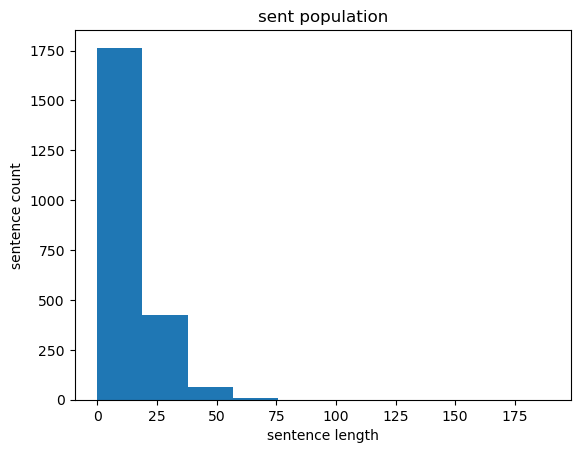

In [125]:
plt.hist(data_len_list)

plt.title('sent population')
plt.xlabel('sentence length')
plt.ylabel('sentence count')
plt.show()

In [132]:
# padding
def padding(data_df, len_data):
    carry = data_df['encoding'].to_list()
    for idx, sent in enumerate(carry):
        current_len = len(sent)
        if current_len < len_data:
            sent.extend([0]*(len_data - current_len))
            carry[idx] = sent
        else:
            sent = sent[current_len - len_data:]
            carry[idx] = sent
    return carry

In [158]:
carry = padding(data_df, 20)
carry

[[1603,
  1055,
  276,
  232,
  2113,
  733,
  1604,
  404,
  1056,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [118,
  356,
  2,
  4717,
  55,
  1606,
  2966,
  876,
  405,
  2967,
  2965,
  1057,
  734,
  118,
  1605,
  0,
  0,
  0,
  0,
  0],
 [1270,
  629,
  877,
  1269,
  1058,
  878,
  528,
  1607,
  1270,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [357,
  112,
  736,
  358,
  69,
  15,
  4723,
  4724,
  2968,
  4725,
  310,
  246,
  1059,
  735,
  4726,
  118,
  175,
  4727,
  55,
  164],
 [4728, 630, 879, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [359, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [81, 4734, 2115, 2972, 880, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [529, 2116, 4735, 4736, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [2973, 4737, 139, 4738, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [159]:
data_df['padding_20'] = carry
data_df

,text,label,del_stop,encoding,padding_25,padding_15,padding_10,padding_20
0,동남아 담당 최희철 부상 베이징 도착 싱가포르행 주목최 부상 행선지 방문 목적 질문...,0,"[동남아, 담당, 최희, 부상, 베이징, 도착, 싱가포르, 주목, 부상, 행선, 방...","[4714, 1602, 4715, 232, 627, 1603, 1055, 276, ...","[4714, 1602, 4715, 232, 627, 1603, 1055, 276, ...","[733, 1604, 404, 1056, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1603, 1055, 276, 232, 2113, 733, 1604, 404, 1..."
1,예결위 추경 막바지 심사 진통 여야 충돌 서울 연합뉴스 김남권 기자 국회 예산결산특...,0,"[결위, 추경, 막바지, 심사, 진통, 여야, 충돌, 서울, 김남, 국회, 예산, ...","[4716, 628, 2965, 1057, 1605, 118, 356, 2, 471...","[4716, 628, 2965, 1057, 1605, 118, 356, 2, 471...","[1606, 2966, 876, 405, 2967, 2965, 1057, 734, ...","[2965, 1057, 734, 118, 1605, 0, 0, 0, 0, 0]","[118, 356, 2, 4717, 55, 1606, 2966, 876, 405, ..."
2,외압 논란 항명 사태 산 넘고 물 건넌 권성동 영장 청구안미현 검사 외압 폭로 파문...,0,"[외압, 논란, 사태, 넘고, 건넌, 영장, 청구, 검사, 외압, 폭로, 파문, 사...","[1269, 8, 406, 4718, 4719, 1270, 629, 877, 126...","[1269, 8, 406, 4718, 4719, 1270, 629, 877, 126...","[878, 528, 1607, 1270, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1270, 629, 877, 1269, 1058, 878, 528, 1607, 1..."
3,친문 홍영표 문빠에 찍혔다 특검 합의에 문자폭탄 공격대표적인 친 문재인계인 홍영표 ...,0,"[친문, 홍영표, 문빠, 찍혔다, 특검, 합의, 문자, 폭탄, 공격대, 표적, 문재...","[2114, 1271, 2968, 4720, 42, 100, 1059, 735, 4...","[735, 4721, 4722, 309, 1271, 357, 112, 736, 35...","[15, 4723, 4724, 2968, 4725, 310, 246, 1059, 7...","[310, 246, 1059, 735, 4726, 118, 175, 4727, 55...","[357, 112, 736, 358, 69, 15, 4723, 4724, 2968,..."
4,연일 비난 정상회담 전 경고성 메시지 발신 맥스선더 태영호 등 불만 표시,0,"[연일, 비난, 정상회담, 경고, 메시지, 발신, 불만, 표시]","[2969, 277, 73, 407, 1060, 4728, 630, 879, 0, ...","[2969, 277, 73, 407, 1060, 4728, 630, 879, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[4728, 630, 879, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...
2256,올림픽 성공 뒷이야기 서울대 일 이희범 평창 조직위원장 초청 특강 이인환 기자 서울...,7,"[올림픽, 성공, 뒷이야기, 서울대, 이희범, 평창, 조직, 위원장, 초청, 특강,...","[230, 288, 9777, 589, 1594, 446, 371, 200, 128...","[51, 9778, 1835, 149, 4171, 589, 9779, 181, 47...","[150, 4689, 1594, 446, 2958, 5, 2933, 2934, 5,...","[5, 2933, 2934, 5, 371, 200, 1282, 2085, 30, 174]","[589, 9779, 181, 4713, 325, 150, 4689, 1594, 4..."
2257,일 개막 호치민 쿠션월드컵에 명 참가 확정 선수 명 참가 차 예선에 명 출전,7,"[개막, 호치민, 쿠션, 월드컵, 참가, 확정, 선수, 참가, 예선, 출전]","[1587, 861, 607, 154, 281, 182, 18, 281, 401, ...","[1587, 861, 607, 154, 281, 182, 18, 281, 401, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[182, 18, 281, 401, 161, 0, 0, 0, 0, 0, 0, 0, ..."
2258,김행직 허정한 최성원 시드받아 본선 직행,7,"[김행, 허정한, 최성원, 시드, 본선, 직행]","[4709, 4710, 4711, 129, 863, 4202, 0, 0, 0, 0,...","[4709, 4710, 4711, 129, 863, 4202, 0, 0, 0, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[4202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2259,스포츠안전재단 대축전에 안전필요성 알려 스타뉴스 채준 기자,7,"[스포츠, 안전, 재단, 축전, 안전, 필요성, 알려, 스타, 채준]","[51, 248, 3246, 2881, 248, 2219, 1546, 41, 451...","[51, 248, 3246, 2881, 248, 2219, 1546, 41, 451...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[2219, 1546, 41, 4519, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [157]:
data_df.to_csv('../data/news_data_df.csv', index=False, encoding='utf-8')